In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [31]:
Päästöt=df=pd.read_excel('http://taanila.fi/CO2.xlsx')
df.index = pd.to_datetime(df['Kuukausi'],format="%Y-%m")
df=df.drop('Kuukausi',axis=1)
df.head()



,CO2
Kuukausi,
1999-12-01,368.04
2000-01-01,369.25
2000-02-01,369.50
2000-03-01,370.56
2000-04-01,371.82


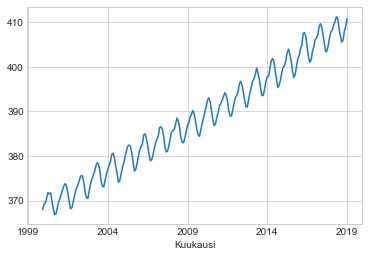

In [32]:
Päästöt['CO2'].plot()

In [33]:
Matkustajat=df=pd.read_csv('http://taanila.fi/AirPassengers.csv')
df.index=pd.to_datetime(df['Month'],format='%Y-%m')
df=df.drop('Month',axis=1)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


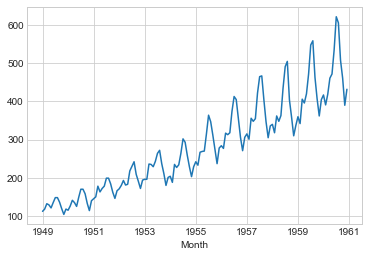

In [34]:
Matkustajat['#Passengers'].plot()

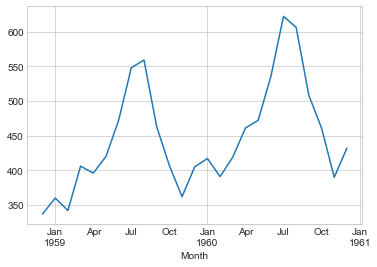

In [35]:
Matkustajat['#Passengers']['1958-12':].plot()

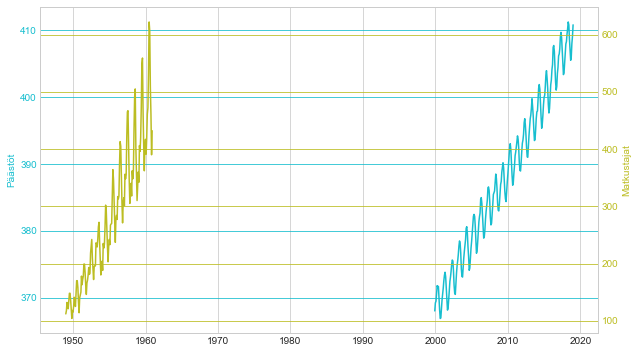

In [55]:
fig1, ax1 = plt.subplots(figsize = (10, 6))

color = 'C9'
ax1.set_ylabel('Päästöt', color=color)
ax1.plot(Päästöt['CO2'], color=color)
ax1.tick_params(axis='y', labelcolor=color, grid_color=color)

ax2 = ax1.twinx()

color = 'C8'
ax2.set_ylabel('Matkustajat', color=color)
ax2.plot(Matkustajat['#Passengers'], color=color)
ax2.tick_params(axis='y', labelcolor=color, grid_color=color)

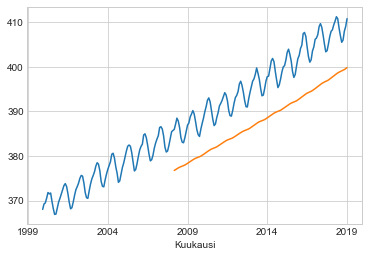

In [85]:
Päästöt['CO2'].plot()

Päästöt['CO2'].rolling(100).mean().plot()

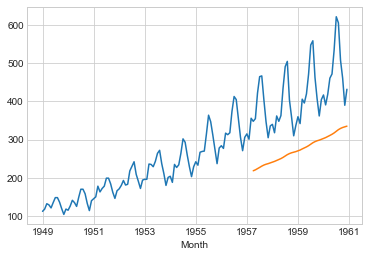

In [88]:
Matkustajat['#Passengers'].plot()

Matkustajat['#Passengers'].rolling(100).mean().plot()

In [89]:
Päästöt['Päästöt_Change'] = Päästöt['CO2'].pct_change()
Päästöt.head()

,Kuukausi,CO2,Päästöt_Change
Kuukausi,,,
1999-12-01,1999-12,368.04,NaN
2000-01-01,2000-1,369.25,0.003288
2000-02-01,2000-2,369.50,0.000677
2000-03-01,2000-3,370.56,0.002869
2000-04-01,2000-4,371.82,0.003400


In [90]:
Matkustajat['Matkustajat_Change'] = Matkustajat['#Passengers'].pct_change()
Matkustajat.head()

,Month,#Passengers,Matkustajat_Change
Month,,,
1949-01-01,1949-01,112,NaN
1949-02-01,1949-02,118,0.053571
1949-03-01,1949-03,132,0.118644
1949-04-01,1949-04,129,-0.022727
1949-05-01,1949-05,121,-0.062016


In [93]:
muutokset = pd.concat([Päästöt['Päästöt_Change'], Matkustajat['Matkustajat_Change']], axis=1)
muutokset.head()

,Päästöt_Change,Matkustajat_Change
1949-01-01,NaN,NaN
1949-02-01,NaN,0.053571
1949-03-01,NaN,0.118644
1949-04-01,NaN,-0.022727
1949-05-01,NaN,-0.062016


[Text(0, 0, '-30 %'),
 Text(0, 0, '-20 %'),
 Text(0, 0, '-10 %'),
 Text(0, 0, '0 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '30 %')]

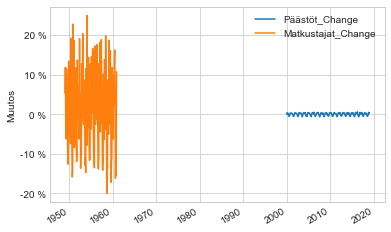

In [94]:
ax5 = muutokset['1949-01':].plot()

ax5.set_ylabel('Muutos')

vals = ax5.get_yticks()
ax5.set_yticklabels(['{:.0f} %'.format(y*100) for y in vals])

In [95]:
muutokset.describe()

,Päästöt_Change,Matkustajat_Change
count,229.000000,143.000000
mean,0.000486,0.015169
std,0.003318,0.107606
min,-0.006476,-0.200000
25%,-0.002872,-0.076904
50%,0.001514,0.014925
75%,0.003334,0.111697
max,0.006372,0.250000


In [101]:
muutokset[(muutokset['Päästöt_Change']<-0.002) | (muutokset['Matkustajat_Change']>0.1)]

,Päästöt_Change,Matkustajat_Change
1949-03-01,NaN,0.118644
1949-06-01,NaN,0.115702
1949-12-01,NaN,0.134615
1950-03-01,NaN,0.119048
1950-06-01,NaN,0.192000
1950-07-01,NaN,0.140940
1950-12-01,NaN,0.228070
1951-03-01,NaN,0.186667
1951-07-01,NaN,0.117978
1951-12-01,NaN,0.136986


In [102]:
muutokset.corr()

,Päästöt_Change,Matkustajat_Change
Päästöt_Change,1.0,NaN
Matkustajat_Change,NaN,1.0


In [106]:
muutokset['Weekday'] = muutokset.index.weekday

muutokset.groupby('Weekday')['Päästöt_Change'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,31.0,0.000334,0.003260,-0.005683,-0.002815,0.001208,0.002968,0.003979
1,34.0,0.000723,0.003291,-0.005384,-0.002674,0.001612,0.003405,0.004881
2,31.0,0.000096,0.003293,-0.006476,-0.002933,0.001308,0.002735,0.004333
3,34.0,0.000911,0.003346,-0.005802,-0.001743,0.002195,0.003425,0.004975
4,32.0,0.000081,0.003568,-0.006371,-0.003352,0.001121,0.002854,0.006372
5,34.0,0.000569,0.003410,-0.005931,-0.002934,0.001323,0.003384,0.005410
6,33.0,0.000618,0.003267,-0.005063,-0.001692,0.000750,0.003485,0.004785


In [107]:
muutokset['Weekday'] = muutokset.index.weekday

muutokset.groupby('Weekday')['Matkustajat_Change'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,19.0,-0.012089,0.115012,-0.200000,-0.095984,-0.025723,0.074116,0.250000
1,23.0,0.003186,0.104993,-0.171735,-0.094113,0.029412,0.094139,0.145923
2,19.0,0.026778,0.098412,-0.142857,-0.024639,0.011905,0.117375,0.166667
3,21.0,0.020586,0.115226,-0.161716,-0.098765,0.011050,0.134615,0.192000
4,21.0,0.046776,0.097205,-0.121037,-0.022727,0.034884,0.100239,0.228070
5,19.0,0.003316,0.109301,-0.136490,-0.095998,0.020073,0.100687,0.188732
6,21.0,0.016149,0.117361,-0.158228,-0.062016,0.000000,0.104278,0.204082


In [ ]:
elisa = pd.read_csv('http://taanila.fi/elisa.csv', sep = ';', decimal = ',', skiprows=1)
telia = pd.read_csv('http://taanila.fi/telia.csv', sep = ';', decimal = ',', skiprows=1)

#Aikaleimat indeksiin:
elisa.index = pd.to_datetime(elisa['Date'],dayfirst=True)
telia.index = pd.to_datetime(telia['Date'],dayfirst=True)

#Järjestän aikasarjan indeksin mukaan vanhimmasta uusimpaan:
elisa.sort_index(inplace = True)
telia.sort_index(inplace = True)